In this experiment, I want to get used to more advanced mail parsing in order to include more mails in our converted dataset.

In [14]:
import email.parser as parser
import pandas as pd
import numpy as np
import re
import os

def read_maildir(path):
    return read_folder(path)
        
def read_folder(path):
    result = {}
    children = os.listdir(path)
    for child in children:
        child_path = os.path.join(path, child)
        if os.path.isdir(child_path):
            result.update(read_folder(child_path))
        else:
            with open(child_path, "rb") as f:
                message = parser.BytesParser().parse(f, headersonly=True)
                result[child_path] = {
                    "from": message["from"], 
                    "to": message["to"], 
                    "subject": message["subject"], 
                    "date": message["date"]}
    return result   
    
mails = read_maildir("../data/maildir")

In [15]:
df = pd.DataFrame(mails).transpose()
df.head()

,from,to,subject,date
../data/maildir/mckay-b/all_documents/44.,brad.mckay@enron.com,glaguarta@cadencemcshane.com,Re: Dove hunt,"Tue, 18 Jul 2000 08:04:00 -0700 (PDT)"
../data/maildir/mckay-b/all_documents/11.,brad.mckay@enron.com,rex@arn.net,Re: The Deal!,"Thu, 7 Dec 2000 07:05:00 -0800 (PST)"
../data/maildir/mckay-b/all_documents/61.,brad.mckay@enron.com,8915473@archwireless.net,Re: Wireless Message,"Tue, 8 May 2001 08:34:00 -0700 (PDT)"
../data/maildir/mckay-b/all_documents/57.,brad.mckay@enron.com,8915473@archwireless.net,Re: Wireless Message,"Wed, 9 May 2001 09:14:00 -0700 (PDT)"
../data/maildir/mckay-b/all_documents/38.,brad.mckay@enron.com,ghathaway@mmcable.com,Re: Follow-up from Friday meetings with Enron,"Mon, 18 Sep 2000 04:55:00 -0700 (PDT)"


In [16]:
len(df)

517401

In [18]:
mails_from_enron = df[df["from"].str.contains("enron.com", case=False)]
print(len(mails_from_enron))
mails_from_enron_without_duplicates = mails_from_enron.drop_duplicates(subset=["from", "subject", "date"])
print(len(mails_from_enron_without_duplicates))

429754
197960


In [20]:
# Verify that duplicates were removed correctly
print("Without trimming")
print(mails_from_enron[mails_from_enron["subject"] == "Overview of Investor Conference Call"])
print("With trimming")
print(mails_from_enron_without_duplicates[mails_from_enron_without_duplicates["subject"] == "Overview of Investor Conference Call"])

Without trimming
                                                                     from  \
../data/maildir/ybarbo-p/inbox/604.                chairman.ken@enron.com   
../data/maildir/reitmeyer-j/inbox/438.             chairman.ken@enron.com   
../data/maildir/ruscitti-k/inbox/253.              chairman.ken@enron.com   
../data/maildir/whalley-g/inbox/349.               chairman.ken@enron.com   
../data/maildir/weldon-c/deleted_items/205.        chairman.ken@enron.com   
...                                                                   ...   
../data/maildir/stepenovitch-j/deleted_items/216.  chairman.ken@enron.com   
../data/maildir/campbell-l/inbox/1455.             chairman.ken@enron.com   
../data/maildir/hodge-j/inbox/673.                 chairman.ken@enron.com   
../data/maildir/buy-r/inbox/480.                   chairman.ken@enron.com   
../data/maildir/heard-m/inbox/227.                 chairman.ken@enron.com   

                                                          

Now, let's redo the calculations from exp003 with the complete dataset.

In [66]:
m = mails_from_enron_without_duplicates
m["date"] = pd.to_datetime(m["date"], utc=True)
m = m[m["date"] > "1999-01-01"]

/tmp/ipykernel_5856/1778109019.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m["date"] = pd.to_datetime(m["date"], utc=True)


In [67]:
m["week"] = m["date"].apply(lambda x: x.isocalendar()[1])
m["year"] = m["date"].apply(lambda x: x.year)
m["month"] = m["date"].apply(lambda x: x.month)
m["seconds_since_midnight"] = m["date"].apply(lambda x: x.time().hour * 60 * 60 + x.time().minute * 60 + x.time().second)
m.head()

/tmp/ipykernel_5856/3335207982.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m["week"] = m["date"].apply(lambda x: x.isocalendar()[1])
/tmp/ipykernel_5856/3335207982.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m["year"] = m["date"].apply(lambda x: x.year)
/tmp/ipykernel_5856/3335207982.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

,from,to,subject,date,week,year,month,seconds_since_midnight
../data/maildir/mckay-b/all_documents/44.,brad.mckay@enron.com,glaguarta@cadencemcshane.com,Re: Dove hunt,2000-07-18 15:04:00+00:00,29,2000,7,54240
../data/maildir/mckay-b/all_documents/11.,brad.mckay@enron.com,rex@arn.net,Re: The Deal!,2000-12-07 15:05:00+00:00,49,2000,12,54300
../data/maildir/mckay-b/all_documents/61.,brad.mckay@enron.com,8915473@archwireless.net,Re: Wireless Message,2001-05-08 15:34:00+00:00,19,2001,5,56040
../data/maildir/mckay-b/all_documents/57.,brad.mckay@enron.com,8915473@archwireless.net,Re: Wireless Message,2001-05-09 16:14:00+00:00,19,2001,5,58440
../data/maildir/mckay-b/all_documents/38.,brad.mckay@enron.com,ghathaway@mmcable.com,Re: Follow-up from Friday meetings with Enron,2000-09-18 11:55:00+00:00,38,2000,9,42900


In [68]:
avg_working_hours = m.groupby(["from","year", "month", "week"])["seconds_since_midnight"].agg(["max", "min"]).groupby(["from", "year", "month"]).agg("mean").reset_index(level="from")
avg_working_hours_reset = avg_working_hours.reset_index()
avg_working_hours_reset["day"] = 1
avg_working_hours_reset["x"] = pd.to_datetime(avg_working_hours_reset[["year", "month", "day"]])

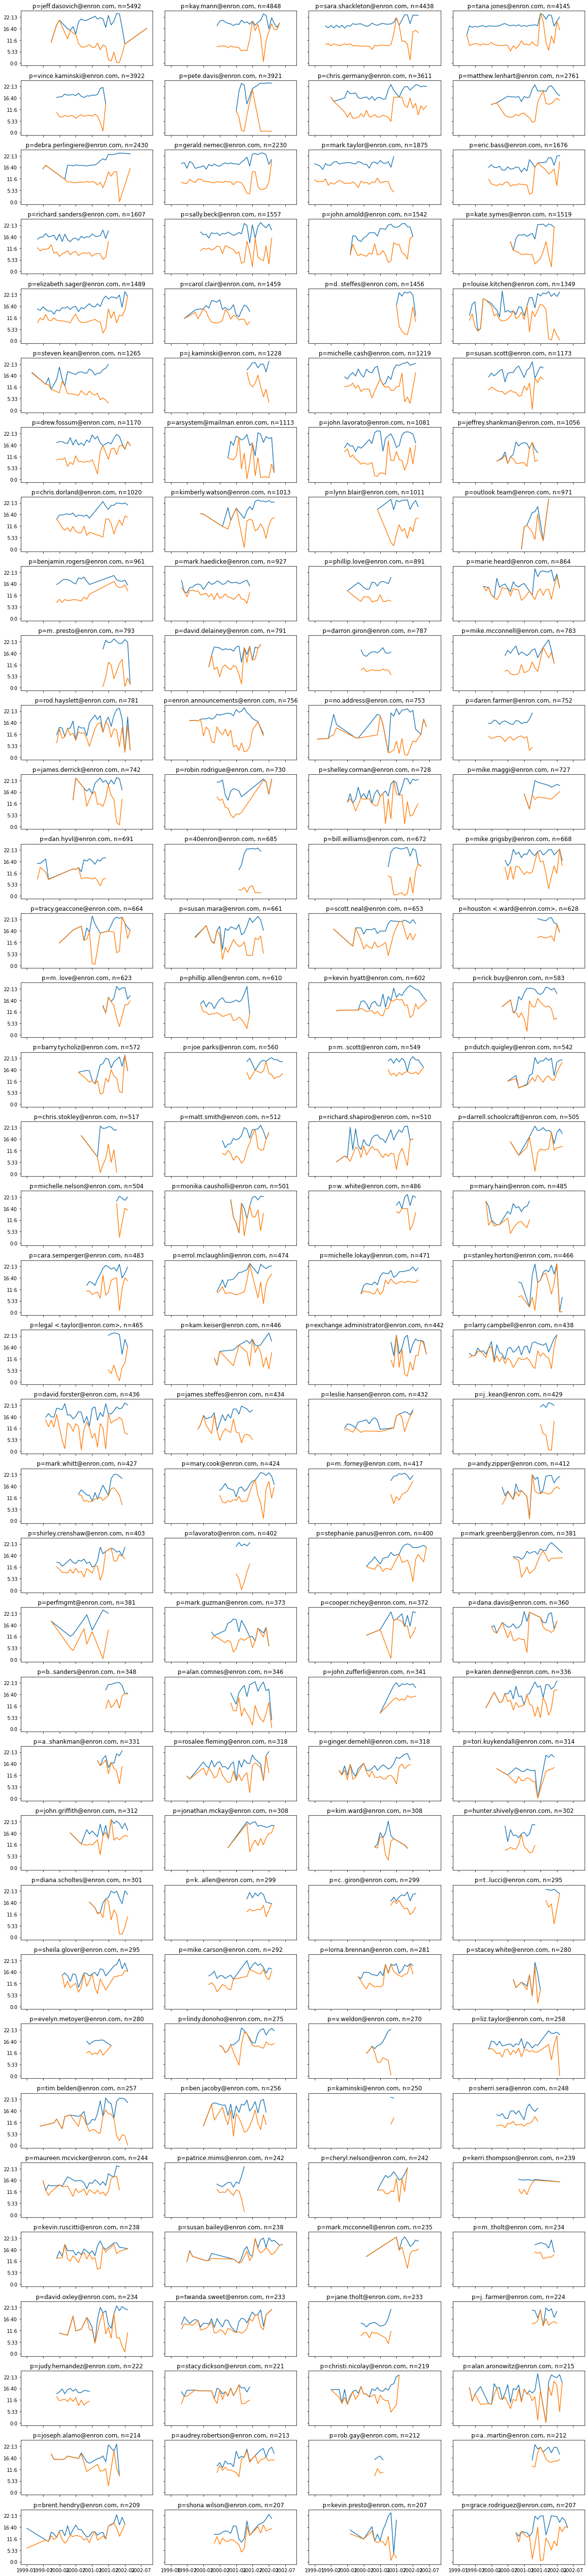

In [70]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

most_frequent_senders = m.value_counts("from").index.tolist()[:148]
most_frequent_senders
fig, axs = plt.subplots(37, 4, figsize=(17, 74), sharey=True, sharex=True)

def seconds_in_time(x, pos):
    hours = x // 3600
    minutes = (x - (hours * 3600)) // 60
    return '%d:%d' % (hours, minutes)

formatter = FuncFormatter(seconds_in_time)

for i in range(len(most_frequent_senders)):
    current_row = i // 4
    current_col = i % 4
    current_dataset = avg_working_hours_reset[avg_working_hours_reset["from"] == most_frequent_senders[i]]
    axs[current_row][current_col].plot(np.array(current_dataset["x"]), np.array(current_dataset[["max", "min"]]))
    axs[current_row][current_col].yaxis.set_major_formatter(formatter)
    n = len(m[m["from"] == most_frequent_senders[i]])
    axs[current_row][current_col].set_title(f"p={most_frequent_senders[i]}, n={n}")
fig.tight_layout()
plt.show()